In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [4]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [3]:
timeseries_data = np.load('/content/drive/My Drive/training_dataset/training_data.npy')
print(timeseries_data.shape)

categories_data = np.load('/content/drive/My Drive/training_dataset/categories.npy')
print(categories_data.shape)

valid_periods = np.load('/content/drive/My Drive/training_dataset/valid_periods.npy')
print(valid_periods.shape)

(48000, 2776)
(48000,)
(48000, 2)


In [5]:
timeseries_data_df = pd.DataFrame(timeseries_data)
timeseries_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1016.6 MB


In [6]:
min, max = (9999, -1), (0, -1)
lengths = []
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    lengths.append(diff)
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)

min, max

((24, 47852), (2776, 17143))

In [7]:
sample_first = timeseries_data_df.T[0]
sample_shortest = timeseries_data_df.T[min[1]]
sample_longest = timeseries_data_df.T[max[1]]

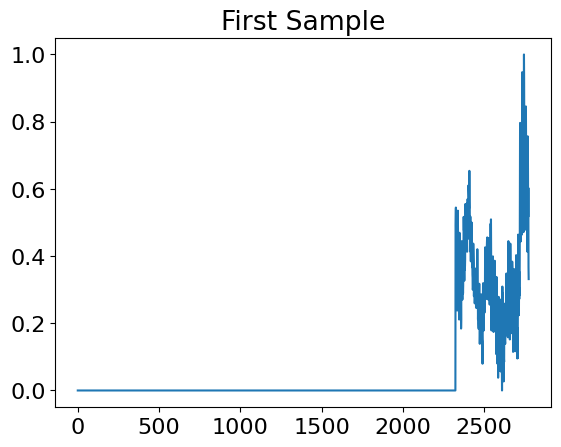

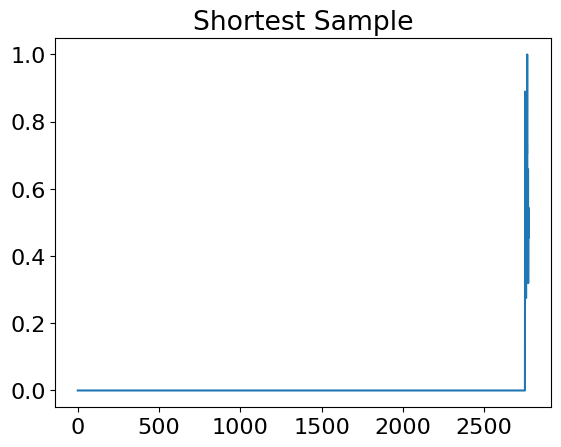

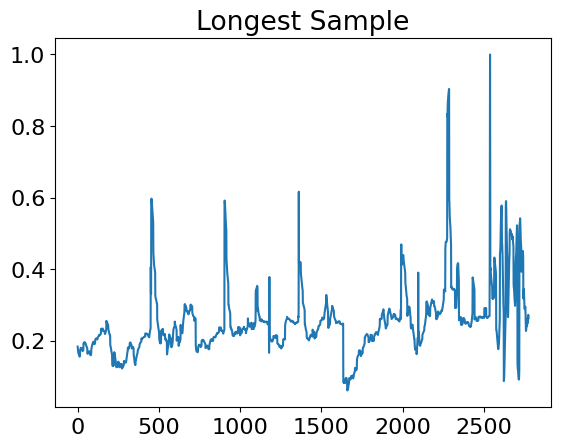

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.700e+01, 1.230e+02, 8.000e+01, 4.900e+01, 4.100e+01, 4.400e+01,
        5.200e+02, 1.104e+03, 4.870e+02, 6.703e+03, 6.590e+02, 4.900e+01,
        2.800e+01, 6.900e+01, 2.720e+02, 2.870e+02, 7.100e+01, 1.270e+02,
        3.120e+02, 3.400e+02, 8.300e+01, 5.300e+01, 9.650e+02, 1.880e+02,
        1.900e+01, 3.900e+01, 3.000e+01, 2.100e+01, 1.400e+01, 4.700e+01,
        6.900e+01, 3.450e+02, 7.000e+00, 1.200e+01, 1.100e+01, 2.300e+01,
        9.000e+00, 8.000e+00, 3.200e+0

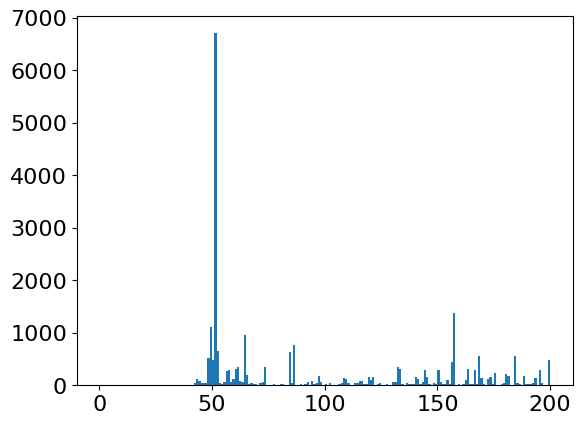

In [ ]:
plt.hist(lengths, bins=200, range=(0,200))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 2.410e+02, 1.758e+03, 7.926e+03, 8.260e+02,
        1.753e+03, 2.970e+02, 4.820e+02, 6.300e+01, 6.910e+02, 8.450e+02,
        1.810e+02, 3.140e+02, 8.000e+01, 3.350e+02, 1.450e+02, 3.620e+02,
        3.260e+02, 6.700e+01, 8.080e+02, 1.130e+02, 6.430e+02, 2.530e+02,
        5.010e+02, 1.881e+03, 4.560e+02, 1.032e+03, 3.310e+02, 3.110e+02,
        9.800e+02, 2.880e+02, 2.310e+02, 4.050e+02, 6.310e+02, 4.900e+02,
        3.210e+02, 1.966e+03, 7.100e+02, 5.010e+02, 5.500e+01, 2.950e+02,
        2.360e+02, 1.220e+02, 6.790e+02, 6.000e+01, 8.430e+02, 2.800e+02,
        6.570e+02, 5.030e+02, 8.300e+01, 6.654e+03, 1.250e+02, 1.056e+03,
        1.830e+02, 4.500e+01, 5.620e+02, 4.420e+02, 1.160e+02, 6.700e+01,
        5.630e+02, 2.350e+02, 1.500e+02, 2.950e+02, 3.400e+01, 2.300e+01,
        5.000e+01, 1.250e+02, 7.300e+01, 2.500e+01, 2.060e+02, 4.300e+01,
        2.300e+01, 9.400e+01, 3.800e+0

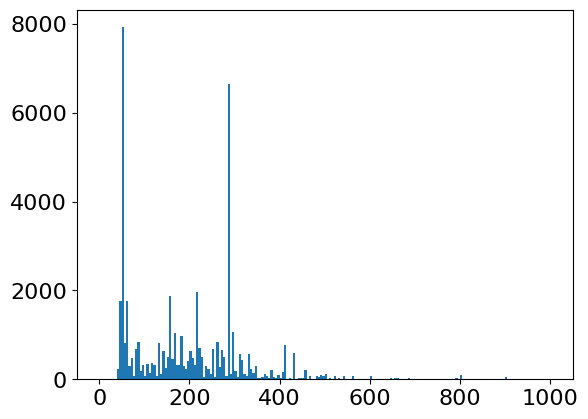

In [ ]:
plt.hist(lengths, bins=200, range=(0,1000))

### Function to create sub-arrays of size 218 from valid periods

In [41]:
window_size = 200
telescope = 9
autoregressive_telescope = 9
assert autoregressive_telescope <= telescope
stride = 5

In [42]:
# Function to create sub-arrays of size 218 from valid periods with sliding
def create_sub_arrays(data, valid_periods, onehot_categories, window_size, stride):
    sub_arrays = []
    cat_values = []
    for i in range(len(data)):
        start, end = valid_periods[i]
        valid_data = data[i, start:end]
        length = len(valid_data)

        if length < window_size:
            # Padding with mean
            mean_value = np.mean(valid_data)
            padding = np.full((window_size - length,), mean_value)
            padded_data = np.concatenate([valid_data, padding])
            sub_arrays.append(padded_data)
            cat_values.append(onehot_categories[i])
        else:
            for j in range(start, end - window_size + 1, stride):
                sub_arrays.append(data[i, j:j + window_size])
                cat_values.append(onehot_categories[i])

    return np.array(sub_arrays), np.array(cat_values)

In [43]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories_data.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Create sub arrays

In [44]:
sub_arrays, cat_data = create_sub_arrays(timeseries_data, valid_periods, onehot_categories, window_size+autoregressive_telescope, stride)


### Splitting the data into features and targets

In [45]:

X = sub_arrays[:, :200]  # First 200 values as features
y = sub_arrays[:, 200:]  # Next 18 values as targets

In [46]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test, cat_train, cat_test = train_test_split(X, y, cat_data, test_size=0.1, random_state=42)


# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape, cat_train.shape, cat_test.shape

((452326, 200, 1),
 (50259, 200, 1),
 (452326, 9),
 (50259, 9),
 (452326, 6),
 (50259, 6))

### LSTM Model

In [17]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf

def scaled_dot_product_attention(query, key, value):
    """ Calculate the attention weights. """
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output

class SelfAttention(tfkl.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.query_dense = tfkl.Dense(d_model)
        self.key_dense = tfkl.Dense(d_model)
        self.value_dense = tfkl.Dense(d_model)

    def call(self, x):
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        attention = scaled_dot_product_attention(query, key, value)
        return attention

In [98]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Conv1D, Dense, Concatenate, RepeatVector, Cropping1D
from tensorflow.keras.models import Model

import tensorflow.keras.layers as tfkl
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dropout, Dense, Reshape, Concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv1D, Cropping1D,MaxPooling1D,RepeatVector, Bidirectional, LSTM, GlobalAveragePooling1D, Dropout, Dense, Reshape, Concatenate
from tensorflow.keras.models import Model

def build_CONV_LSTM_model(input_shape, category_shape, output_shape):
    # Ensure the input time steps are at least as many as the output time steps
    assert input_shape[0] >= output_shape[0], "Input time steps should be >= output time steps"

    # Time Series Input
    input_layer = Input(shape=input_shape, name='input_layer')

    # Convolutional Layers
    x = Conv1D(256,11, padding='same', activation='relu', name='conv1')(input_layer)
    x = MaxPooling1D()(x)
    x = tfkl.Dropout(.1)(x)
    x = Conv1D(128,7, padding='same', activation='relu', name='conv2')(x)
    x = MaxPooling1D()(x)
    x = tfkl.Dropout(.1)(x)
    x = Conv1D(64, 5, padding='same', activation='relu', name='conv3')(x)
    x = MaxPooling1D()(x)
    x = tfkl.Dropout(.1)(x)

    # Encoder: LSTM Layers
    x = Bidirectional(LSTM(128, return_sequences=True, name='lstm_encoder1'))(x)
    encoder_states = Bidirectional(LSTM(64, return_sequences=False, name='lstm_encoder2'))(x)

    # Decoder: Repeat the context vector for the sequence length
    decoder_input = RepeatVector(12)(encoder_states)

    # Decoder: LSTM Layers
    x = Bidirectional(LSTM(64, return_sequences=True, name='lstm_decoder1'))(decoder_input)
    x = Bidirectional(LSTM(128, return_sequences=True, name='lstm_decoder2'))(x)

    x = tfkl.Dropout(.1)(x)
    # Self-Attention layer
    x = SelfAttention(128)(x)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)


    # Category Input
    category_input = Input(shape=category_shape, name='category_input')
    category_processed = Dense(32, activation='relu')(category_input)

    category_processed = RepeatVector(input_shape[0])(category_processed)
    category_processed = MaxPooling1D(pool_size=16)(category_processed)
    # Combine the processed inputs
    combined = Concatenate()([x, category_processed])

    # Output Convolution Layer
    output_layer = Conv1D(256, 7, padding='same', name='output_layer1')(combined)
    output_layer = Conv1D(16, 5, padding='same', name='output_layer4')(output_layer)
    output_layer = Conv1D(output_shape[1], 3, padding='same', name='output_layer')(combined)
    # Adjust output size if necessary
    if output_layer.shape[1] > output_shape[0]:
        crop_size = output_layer.shape[1] - output_shape[0]
        print(crop_size)
        output_layer = Cropping1D((0, crop_size))(output_layer)
        print(output_layer.shape)

    # Construct the model
    model = Model(inputs=[input_layer, category_input], outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model


In [59]:
y_train.shape

(452326, 9)

In [99]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
model = build_CONV_LSTM_model((200, 1), (6,), (9, 1))

3
(None, 9, 1)


In [82]:
model.summary()

Model: "CONV_LSTM_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1 (Conv1D)              (None, 200, 256)             3072      ['input_layer[0][0]']         
                                                                                                  
 max_pooling1d_73 (MaxPooli  (None, 100, 256)             0         ['conv1[0][0]']               
 ng1D)                                                                                            
                                                                                                  
 dropout_27 (Dropout)        (None, 100, 256)             0         ['max_pooling1d_

In [22]:
X_train.shape

(431756, 200, 1)

In [ ]:
cat_test.shape

(57370, 6)

In [ ]:
y_test.shape

(57370, 1)

### Train Model

In [23]:
batch_size=64
epochs = 20


In [37]:
y_train.shape

(485726, 1)

In [110]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    patience=3,
    factor=0.1,
    min_lr=1e-5
)

history = model.fit(
    x = [X_train, cat_train],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_test, cat_test], y_test),
    callbacks = [
        early_stopping,
        reduce_lr
    ]
).history

Epoch 1/20
   95/25130 [..............................] - ETA: 12:02 - loss: 0.0055

KeyboardInterrupt: ignored

In [102]:
model.save('seq2seq')

In [101]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

NameError: ignored

In [103]:
preds = model.predict([X_test, cat_test])

1571/1571 [==============================] - 19s 10ms/step


In [ ]:
y_test.shape

(57370, 1)

In [ ]:
preds.shape


(57370, 1, 1)

In [105]:
# Predict the test set using the model
predictions = preds

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tf.keras.metrics.mean_squared_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tf.keras.metrics.mean_absolute_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (50259, 9, 1)
Mean Squared Error: 0.00548129016533494
Mean Absolute Error: 0.047434527426958084


In [ ]:
telescope = 9

In [106]:
new_arrays, cat_data_new = create_sub_arrays(timeseries_data, valid_periods, onehot_categories, window_size+telescope, stride)

In [107]:

X_test_reg = new_arrays[:, :200]  # First 200 values as features
y_test_reg = new_arrays[:, 200:]  # Next 18 values as targets
X_test_reg.shape, y_test_reg.shape

((502585, 200), (502585, 9))

In [108]:
X_test_reg = X_test_reg.reshape((X_test_reg.shape[0], X_test_reg.shape[1], 1))
X_test_reg.shape, y_test_reg.shape

((502585, 200, 1), (502585, 9))

In [109]:
# Autoregressive Forecasting
reg_predictions = np.array([])
X_temp = X_test_reg
for reg in range(0,telescope,autoregressive_telescope):
    pred_temp = model.predict([X_temp, cat_data_new])
    if(len(reg_predictions)==0):
        reg_predictions = pred_temp
    else:
        reg_predictions = np.concatenate((reg_predictions,pred_temp),axis=1)
    X_temp = np.concatenate((X_temp[:,autoregressive_telescope:,:],pred_temp), axis=1)

15706/15706 [==============================] - 149s 10ms/step


In [ ]:
print(y_test_reg.shape)

(267985, 9)


In [112]:
# Print the shape of the predictions

print(f"Predictions shape: {reg_predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tf.keras.metrics.mean_squared_error(y_test_reg.flatten(), reg_predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tf.keras.metrics.mean_absolute_error(y_test_reg.flatten(), reg_predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (502585, 9, 1)
Mean Squared Error: 0.0053414348512887955
Mean Absolute Error: 0.04679613932967186


In [113]:
def plot_with_training(y_train, y_true, y_pred, num_samples=3):
    """Plot the training, true, and predicted values for a random sample of sequences."""
    sample_indices = np.random.choice(np.arange(len(y_true)), num_samples, replace=False)

    for i, index in enumerate(sample_indices, 1):
        plt.figure(figsize=(12, 4))

        # Plot the training part (first 200 points)
        plt.plot(y_train[index].flatten(), label='Training Values', color='blue')

        # Plot the true values (next 18 points)
        true_start_index = len(y_train[index])
        plt.plot(range(true_start_index, true_start_index + len(y_true[index])),
                 y_true[index].flatten(), label='True Values', color='green')

        # Plot the predicted values (next 18 points)
        plt.plot(range(true_start_index, true_start_index + len(y_pred[index])),
                 y_pred[index].flatten(), label='Predicted Values', linestyle='--', color='red')

        plt.title(f'Sequence {i} - Training, True vs Predicted')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


In [ ]:
y_test_reg.shape

(267985, 9)

In [ ]:
reg_predictions.shape

(267985, 9, 1)

In [ ]:
X_test_reg.shape

(267985, 200, 1)

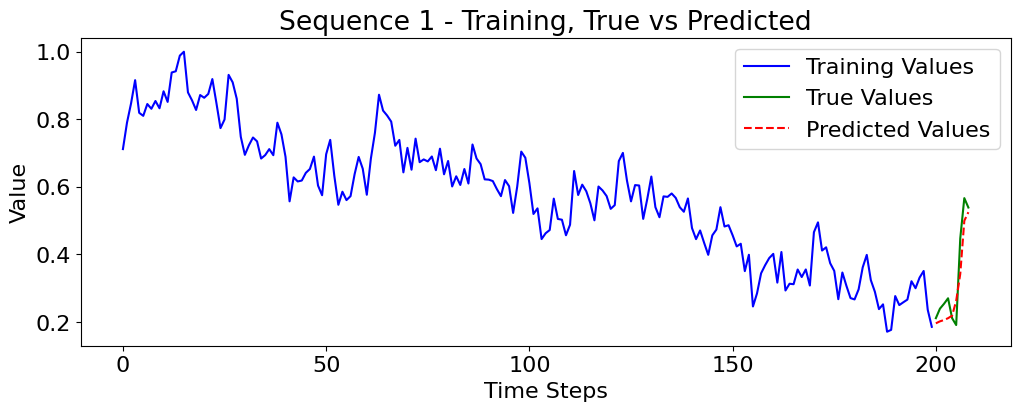

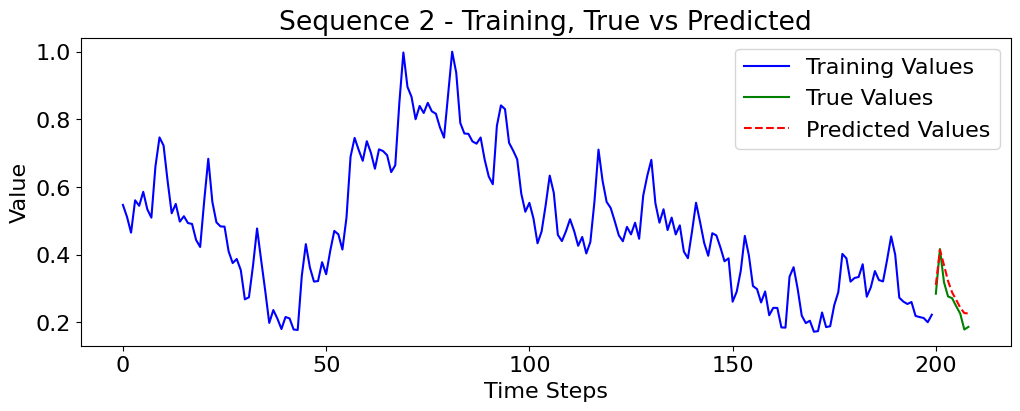

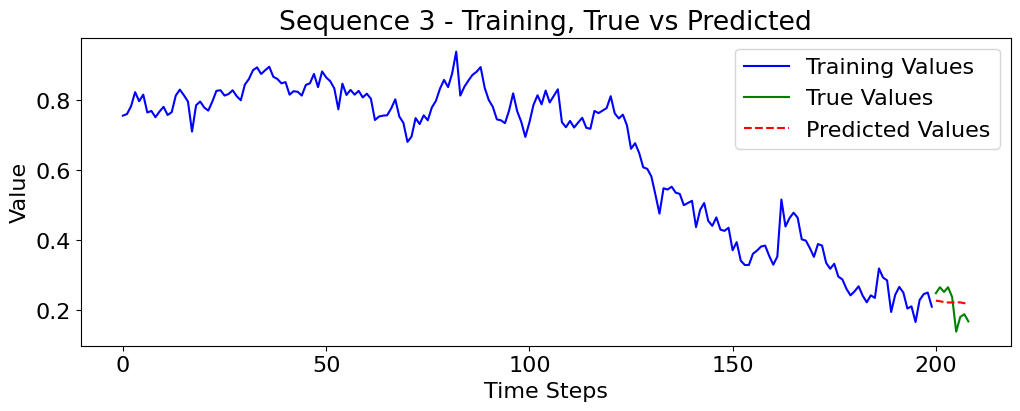

In [114]:
plot_with_training(X_test_reg, y_test_reg, reg_predictions)

In [ ]:
model.save('conv_lstm_padding_tecniques_analysis_1')